In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [121]:
df = pd.read_csv(r"D:\Others\ML MSU\sistem_AI\Bank_marketing_campaign.csv")
df

,Age,Job,Marital Status,Education,Has credit in default,Avg. credit balance,Has housing loan,Has personal loan,Contact type,Last contact day,Last contact month,Last contact duration (sec),Number of contacts,Days passed,Previous contacts,Outcome previous campaign,Subscribed deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [122]:
df.shape

(4521, 17)

In [123]:
df.dtypes

Age                             int64
Job                            object
Marital Status                 object
Education                      object
Has credit in default          object
Avg. credit balance             int64
Has housing loan               object
Has personal loan              object
Contact type                   object
Last contact day                int64
Last contact month             object
Last contact duration (sec)     int64
Number of contacts              int64
Days passed                     int64
Previous contacts               int64
Outcome previous campaign      object
Subscribed deposit             object
dtype: object

In [124]:
df.columns

Index(['Age', 'Job', 'Marital Status', 'Education', 'Has credit in default',
       'Avg. credit balance', 'Has housing loan', 'Has personal loan',
       'Contact type', 'Last contact day', 'Last contact month',
       'Last contact duration (sec)', 'Number of contacts', 'Days passed',
       'Previous contacts', 'Outcome previous campaign', 'Subscribed deposit'],
      dtype='object')

In [125]:
df.isnull().sum()

Age                            0
Job                            0
Marital Status                 0
Education                      0
Has credit in default          0
Avg. credit balance            0
Has housing loan               0
Has personal loan              0
Contact type                   0
Last contact day               0
Last contact month             0
Last contact duration (sec)    0
Number of contacts             0
Days passed                    0
Previous contacts              0
Outcome previous campaign      0
Subscribed deposit             0
dtype: int64

In [126]:
df.describe()

,Age,Avg. credit balance,Last contact day,Last contact duration (sec),Number of contacts,Days passed,Previous contacts
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [128]:
df1 = df.copy()
map1 = {'no': 0, 'yes': 1}
df1['Has credit in default'] = df['Has credit in default'].map(map1)

map2 = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
df1['Education'] = df['Education'].map(map2)

df1['Has housing loan'] = df['Has housing loan'].map(map1)

df1['Has personal loan'] = df['Has personal loan'].map(map1)

map3 = {'unknown': 0, 'cellular': 1, 'telephone': 2}
df1['Contact type'] = df['Contact type'].map(map3)

map4 = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11,
        'dec': 12}
df1['Last contact month'] = df['Last contact month'].map(map4)

map5 = {'unknown': 0, 'failure': 1, 'success': 2, 'other': 3}
df1['Outcome previous campaign'] = df['Outcome previous campaign'].map(map5)

df1['Subscribed deposit'] = df['Subscribed deposit'].map(map1)

map6 = {'divorced': 0, 'married': 1, 'single': 2}
df1['Marital Status'] = df['Marital Status'].map(map6)

map7 = {'unemployed': 0, 'services': 1, 'management': 2, 'blue-collar': 3,
        'self-employed': 4, 'technician': 5, 'entrepreneur': 6, 'admin.': 7, 'student': 8,
        'housemaid': 9, 'retired': 10, 'unknown': 11}
df1['Job'] = df['Job'].map(map7)
df1.head()


,Age,Job,Marital Status,Education,Has credit in default,Avg. credit balance,Has housing loan,Has personal loan,Contact type,Last contact day,Last contact month,Last contact duration (sec),Number of contacts,Days passed,Previous contacts,Outcome previous campaign,Subscribed deposit
0,30,0,1,1,0,1787,0,0,1,19,10,79,1,-1,0,0,0
1,33,1,1,2,0,4789,1,1,1,11,5,220,1,339,4,1,0
2,35,2,2,3,0,1350,1,0,1,16,4,185,1,330,1,1,0
3,30,2,1,3,0,1476,1,1,0,3,6,199,4,-1,0,0,0
4,59,3,1,2,0,0,1,0,0,5,5,226,1,-1,0,0,0


In [129]:
df['Job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [130]:
df_num = pd.get_dummies(df, columns=['Job', 'Marital Status', 'Education', 'Has credit in default', 'Has housing loan',
                                     'Has personal loan', 'Contact type',
                                     'Last contact month', 'Outcome previous campaign', 'Subscribed deposit'])
df_copy = df.copy()
new_data = pd.concat([df_copy, df_num], axis=1)

In [131]:
df_num

,Age,Avg. credit balance,Last contact day,Last contact duration (sec),Number of contacts,Days passed,Previous contacts,Job_admin.,Job_blue-collar,Job_entrepreneur,...,Last contact month_may,Last contact month_nov,Last contact month_oct,Last contact month_sep,Outcome previous campaign_failure,Outcome previous campaign_other,Outcome previous campaign_success,Outcome previous campaign_unknown,Subscribed deposit_no,Subscribed deposit_yes
0,30,1787,19,79,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,True,True,False
1,33,4789,11,220,1,339,4,False,False,False,...,True,False,False,False,True,False,False,False,True,False
2,35,1350,16,185,1,330,1,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,30,1476,3,199,4,-1,0,False,False,False,...,False,False,False,False,False,False,False,True,True,False
4,59,0,5,226,1,-1,0,False,True,False,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,False,False,False,...,False,False,False,False,False,False,False,True,True,False
4517,57,-3313,9,153,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,True,True,False
4518,57,295,19,151,11,-1,0,False,False,False,...,False,False,False,False,False,False,False,True,True,False
4519,28,1137,6,129,4,211,3,False,True,False,...,False,False,False,False,False,True,False,False,True,False


In [132]:
new_data

,Age,Job,Marital Status,Education,Has credit in default,Avg. credit balance,Has housing loan,Has personal loan,Contact type,Last contact day,...,Last contact month_may,Last contact month_nov,Last contact month_oct,Last contact month_sep,Outcome previous campaign_failure,Outcome previous campaign_other,Outcome previous campaign_success,Outcome previous campaign_unknown,Subscribed deposit_no,Subscribed deposit_yes
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,False,False,True,False,False,False,False,True,True,False
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,True,False,False,False,True,False,False,False,True,False
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,False,False,False,False,True,False,False,False,True,False
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,False,False,False,False,False,False,False,True,True,False
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,...,False,False,False,False,False,False,False,True,True,False
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,...,True,False,False,False,False,False,False,True,True,False
4518,57,technician,married,secondary,no,295,no,no,cellular,19,...,False,False,False,False,False,False,False,True,True,False
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,...,False,False,False,False,False,True,False,False,True,False


In [133]:
df.describe()

,Age,Avg. credit balance,Last contact day,Last contact duration (sec),Number of contacts,Days passed,Previous contacts
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [134]:
data = df.copy()
data = data.drop('Job', axis=1)

In [135]:
data.dtypes

Age                             int64
Marital Status                 object
Education                      object
Has credit in default          object
Avg. credit balance             int64
Has housing loan               object
Has personal loan              object
Contact type                   object
Last contact day                int64
Last contact month             object
Last contact duration (sec)     int64
Number of contacts              int64
Days passed                     int64
Previous contacts               int64
Outcome previous campaign      object
Subscribed deposit             object
dtype: object

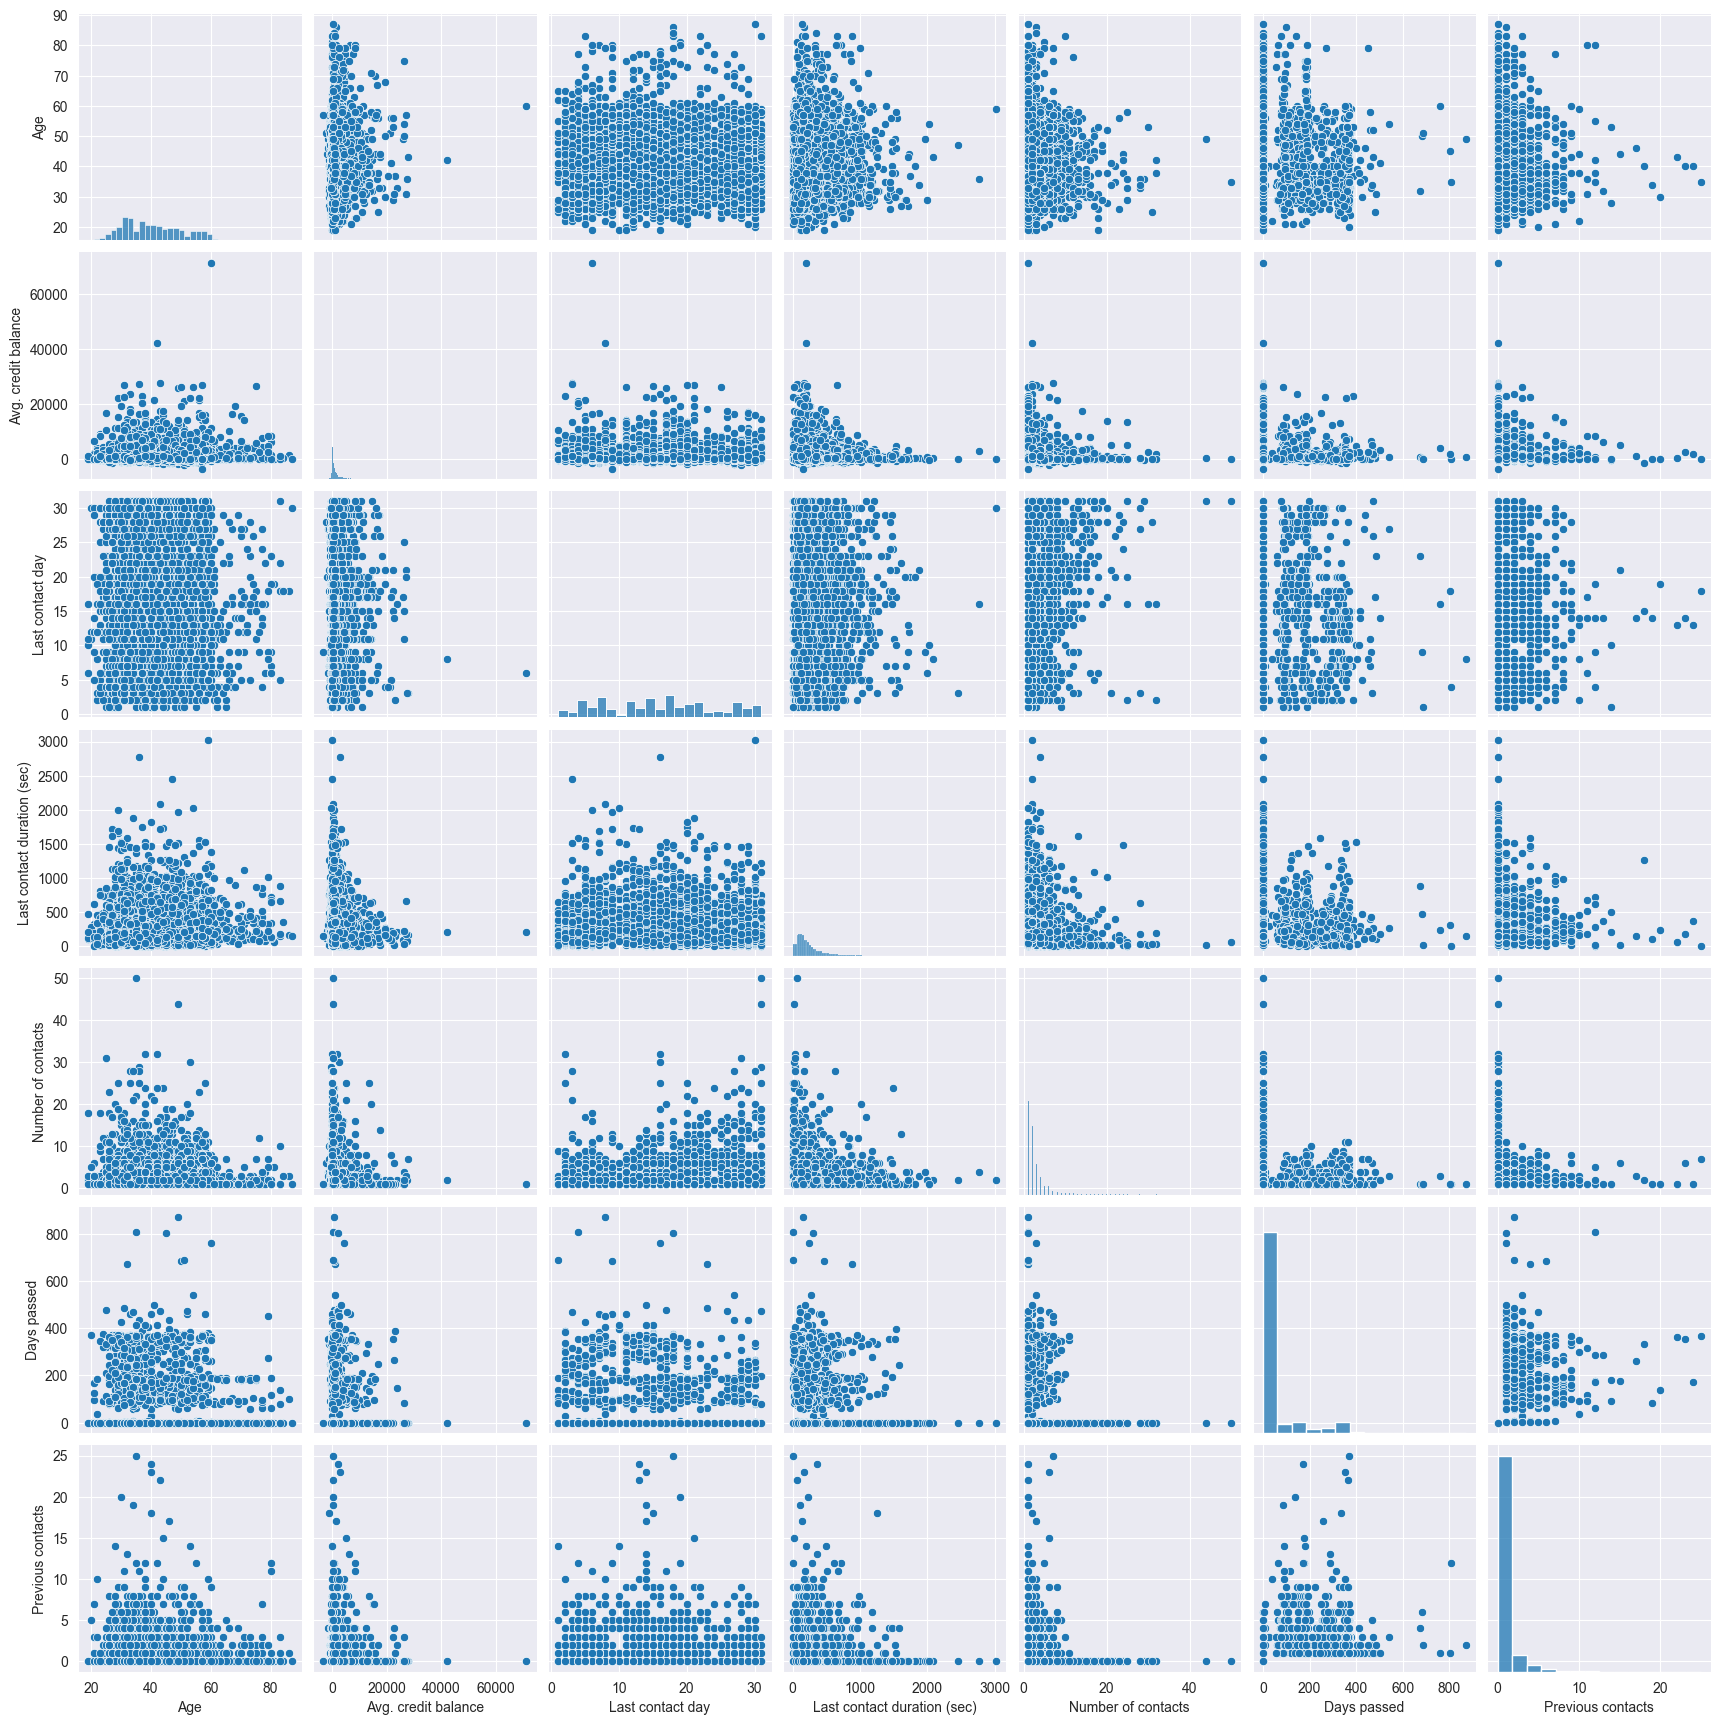

In [136]:
# cols2 = ['Last contact duration (sec)', 'Number of contacts', 'Days passed', 'Previous contacts', 'Subscribed deposit',
#          'Outcome previous campaign']
# sns_plot = sns.pairplot(data[cols2])

sns.pairplot(data=df)

In [137]:
df = pd.read_csv(r'D:\Others\ML MSU\sistem_AI\Bank_marketing_campaign.csv')


def plot_bar(column):
    temp_1 = pd.DataFrame()
    temp_1['No_deposit'] = df[df['Subscribed deposit'] == 'no'][column].value_counts()
    temp_1['Yes_deposit'] = df[df['Subscribed deposit'] == 'yes'][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show()

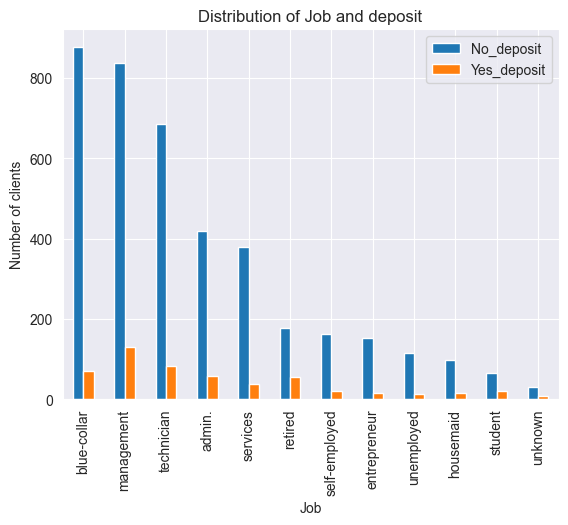

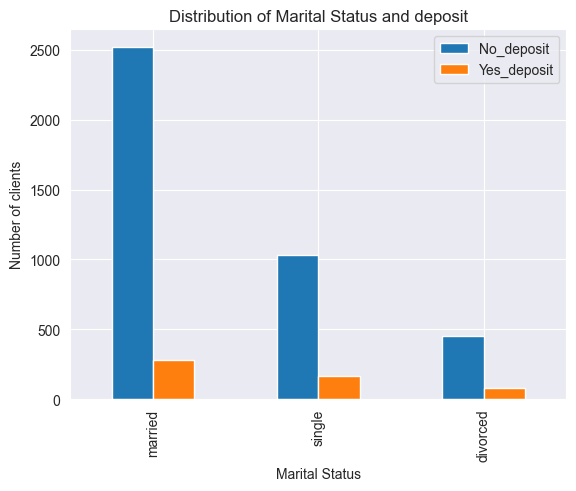

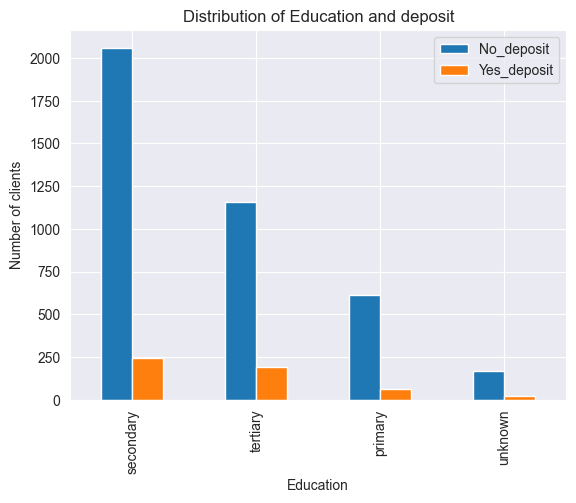

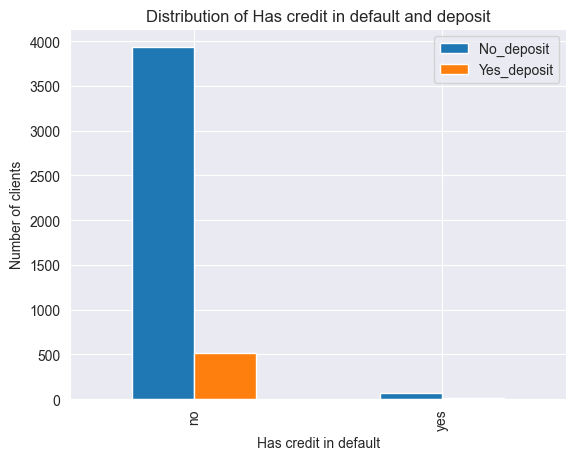

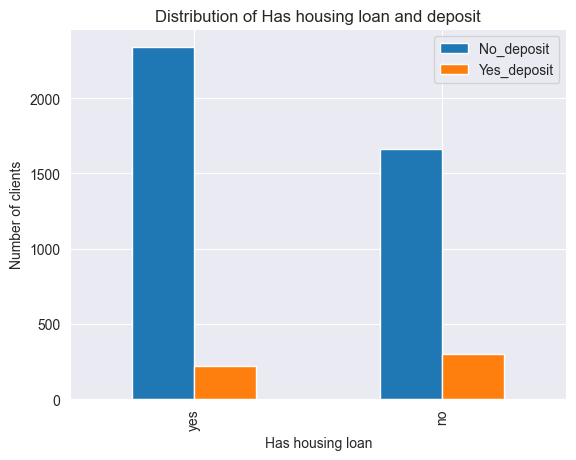

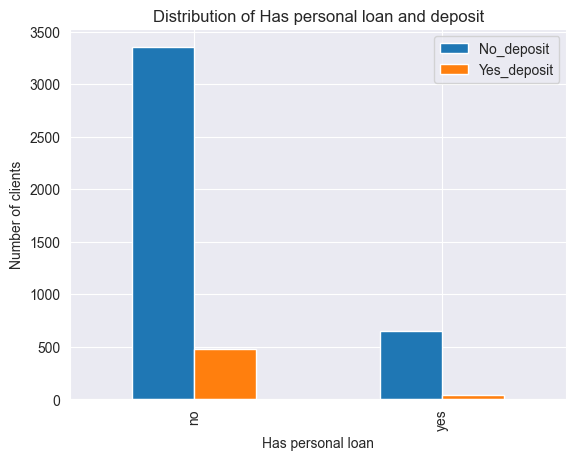

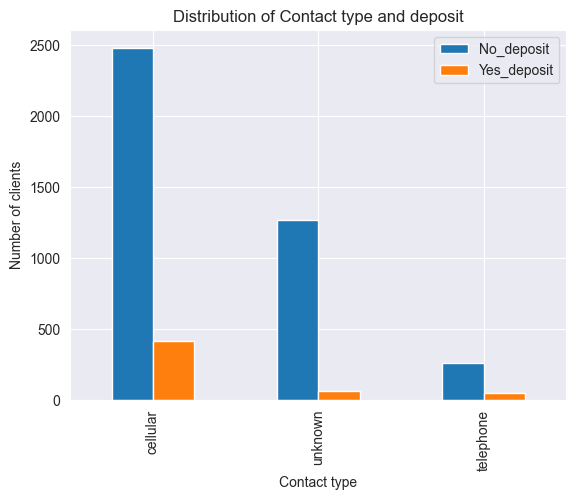

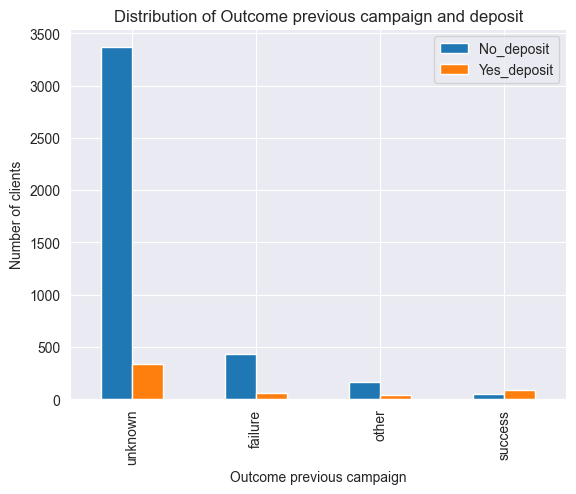

(None, None, None, None, None, None, None, None)

In [138]:
plot_bar('Job'), plot_bar('Marital Status'), plot_bar('Education'), plot_bar('Has credit in default'), plot_bar(
    'Has housing loan'), plot_bar('Has personal loan'), plot_bar('Contact type'), plot_bar('Outcome previous campaign')

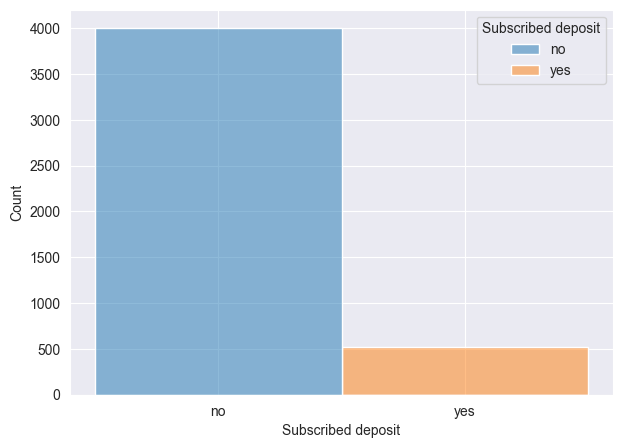

In [139]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Subscribed deposit', kde=True, hue='Subscribed deposit')
plt.show()

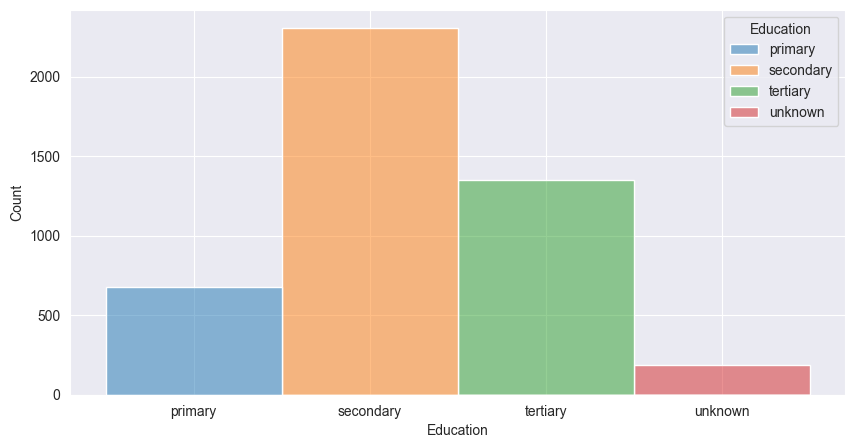

In [140]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Education', kde=True, hue='Education')
plt.show()

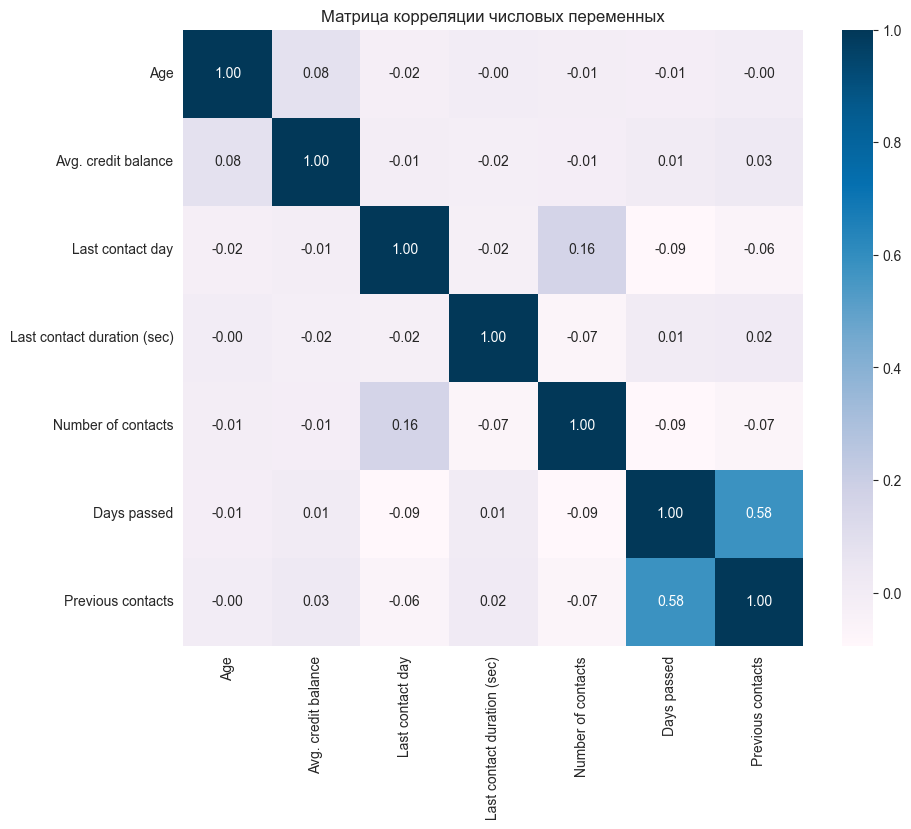

C:\Users\alisher\AppData\Local\Temp\ipykernel_10304\300239519.py:46: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr_cat = corr_cat.fillna(0)


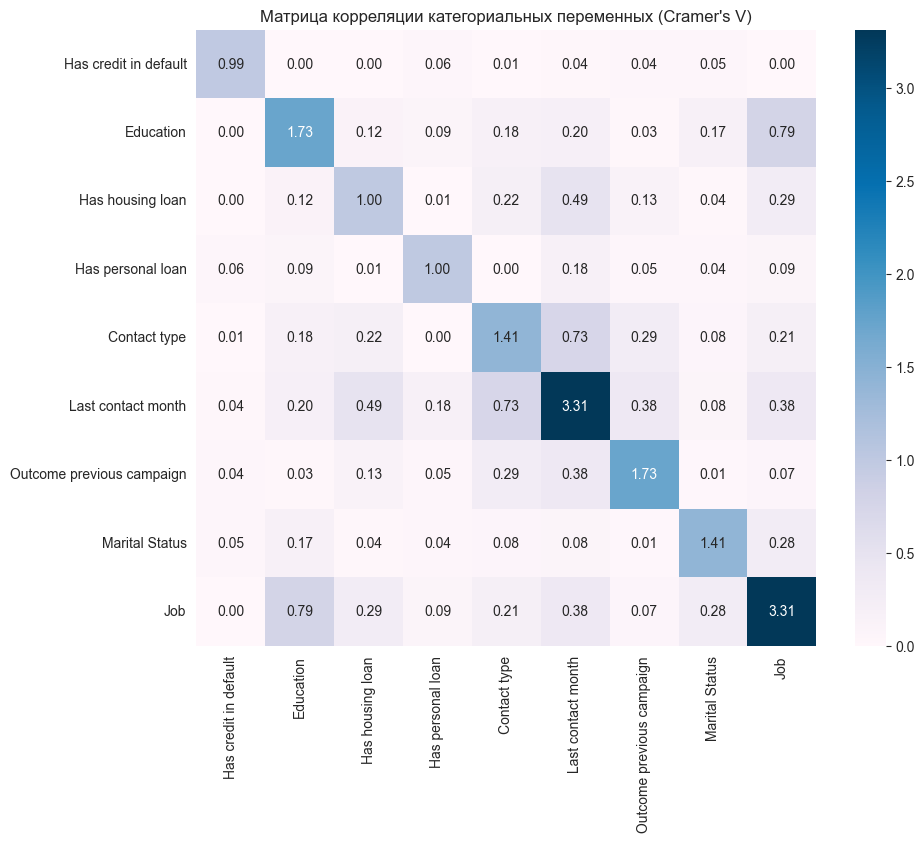

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.copy()
df_corr = df_corr.drop(['Subscribed deposit'], axis=1)

categorical_cols = ['Has credit in default', 'Education', 'Has housing loan', 'Has personal loan',
                    'Contact type', 'Last contact month', 'Outcome previous campaign',
                    'Marital Status', 'Job']

numerical_cols = [col for col in df_corr.columns if col not in categorical_cols]

corr_num = df_corr[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_num, annot=True, cmap='PuBu', fmt=".2f")
plt.title('Матрица корреляции числовых переменных')
plt.show()

from scipy.stats import chi2_contingency


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    return np.sqrt(phi2corr)


corr_cat = pd.DataFrame(index=categorical_cols, columns=categorical_cols)
corr_cat = corr_cat.fillna(0)

corr_cat = corr_cat.astype(float)

# Вычисляем корреляцию Крэмера для каждой пары категориальных столбцов
for col1 in categorical_cols:
    for col2 in categorical_cols:
        corr_cat.loc[col1, col2] = cramers_v(df_corr[col1], df_corr[col2])

plt.figure(figsize=(10, 8))
sns.heatmap(corr_cat, annot=True, cmap='PuBu', fmt=".2f")
plt.title('Матрица корреляции категориальных переменных (Cramer\'s V)')
plt.show()


In [142]:
df['Subscribed deposit']

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: Subscribed deposit, Length: 4521, dtype: object

Logistic Regression :)

In [143]:
df_dummies = pd.get_dummies(df, columns=['Has credit in default', 'Education', 'Has housing loan', 'Has personal loan',
                                         'Contact type', 'Last contact month', 'Outcome previous campaign',
                                         'Marital Status', 'Job'])

y = df['Subscribed deposit'].map({'no': 0, 'yes': 1})
X = df_dummies
X = X.drop('Subscribed deposit', axis=1)

In [144]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [145]:
y_train

4384    0
2560    0
1470    0
1771    0
2604    0
       ..
1033    0
3264    0
1653    1
2607    0
2732    0
Name: Subscribed deposit, Length: 3390, dtype: int64

In [146]:
X_test

,Age,Avg. credit balance,Last contact day,Last contact duration (sec),Number of contacts,Days passed,Previous contacts,Has credit in default_no,Has credit in default_yes,Education_primary,...,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown
4274,35,378,16,427,3,-1,0,True,False,True,...,False,False,False,False,False,False,False,False,False,False
72,31,6248,9,154,2,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1065,30,0,18,756,1,-1,0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3185,42,529,19,193,3,-1,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
130,41,168,18,187,3,-1,0,True,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,45,1477,8,355,1,-1,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2106,47,668,12,908,1,-1,0,True,False,True,...,True,False,False,False,False,False,False,False,False,False
242,44,3762,28,125,12,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4402,41,39,21,549,2,-1,0,True,False,True,...,True,False,False,False,False,False,False,False,False,False


In [147]:
from sklearn.linear_model import LogisticRegression

log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)

C:\Users\alisher\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Оценка модели

In [149]:
from sklearn.metrics import accuracy_score

model = log_regression.predict(X_test)
accuracy = accuracy_score(y_test, model)
print("Точность модели:", accuracy)

Точность модели: 0.8762157382847038


In [150]:
pd.crosstab(y_test, model, margins=True)

col_0,0,1,All
Subscribed deposit,,,
0,963,30,993
1,110,28,138
All,1073,58,1131


In [156]:
y_test.value_counts()  #показывает количество

Subscribed deposit
0    993
1    138
Name: count, dtype: int64

In [158]:
from sklearn import metrics

print(metrics.classification_report(y_test, model))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       993
           1       0.48      0.20      0.29       138

    accuracy                           0.88      1131
   macro avg       0.69      0.59      0.61      1131
weighted avg       0.85      0.88      0.85      1131

